In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing done:
<!-- 1. selecting appropriate rows/data points with BL only -->
1. feature selection
3. multiclass to binary class classification
4. shuffling the dataset
5. replacing the NA values
6. min max scaling/standard scaling This is especially important for logistic regression, which is sensitive to the scale of the features.
6. dropping all the features with more than 50 percent values missing, however keeping some of the features which are important even though some values are missing
7. number of healthy participants is lesser than PD participants, need to fix that..... DONE using SMOTE....... smote should be applied on training set not the testing set otherwise we get misleading results

8. sensitivity specificity etc

3. feature selection done using RFE and manually (and feature engineering?)

1. EDA and visualisations

#left to be done

2. One Hot Label encoding
3. feaeture engineering



#future work
<!-- 1. use algos like grid search to do better feature selection -->
2. meaasures to increase sensitivity and specificty of all models
3. focus on one of the models
4. hyper parameter tuning using techniques like gridsearch

In [92]:
df = pd.read_csv('/Users/shamiksinha/Desktop/ML_Project/PPMI Curated Data.csv')

df = df[df['EVENT_ID'] == 'BL']

df.head()

,SITE,PATNO,COHORT,subgroup,enroll_phase,HIQ_RBD,study_status,NSD_Status,NSD_STAGE,PRIMDIAG,...,mean_putamen,con_striatum,ips_striatum,mean_striatum,Stage_partial_UPDRS1,Stage_subpark,Stage_PDTreat,Stage_S,Stage_D,Stage_G
0,19,100001,1,Sporadic PD,2,NaN,Active,1.0,3,1.0,...,1.080,2.32,3.52,1.4600,7.0,22.0,0.0,1.0,1.0,NaN
4,33,100002,1,Sporadic PD,2,NaN,Active,1.0,3,1.0,...,0.530,1.67,2.01,0.9200,7.0,24.0,0.0,1.0,1.0,NaN
8,33,100005,1,Sporadic PD,2,NaN,Active,1.0,2b,1.0,...,0.615,1.66,2.24,0.9750,6.0,15.0,0.0,1.0,1.0,NaN
11,33,100006,1,Sporadic PD,2,NaN,Active,1.0,3,1.0,...,1.050,2.58,3.74,1.5800,11.0,34.0,0.0,1.0,1.0,NaN
15,33,100007,1,Sporadic PD,2,NaN,Active,1.0,3,1.0,...,0.405,1.19,1.68,0.7175,2.0,20.0,0.0,1.0,1.0,NaN


In [93]:
# Define the threshold for missing values to be removed
threshold = 0.5  # removing columns with more than 50% missing values

# Biomarker features to retain for the purpose of the project
retain_features = ['abeta', 'tau', 'ptau', 'urate', 'nfl_serum', 'upsit']

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean()

# Identify columns to drop, excluding the features we want to retain
cols_to_drop = missing_percentage[missing_percentage > threshold].index
cols_to_drop = [col for col in cols_to_drop if col not in retain_features] 

# Drop the columns
df_cleaned = df.drop(columns=cols_to_drop)

# Display the cleaned DataFrame and the dropped columns
print("Dropped Columns:", cols_to_drop)
print("Cleaned DataFrame Shape:", df_cleaned.shape)

# Assign cleaned DataFrame to df
df = df_cleaned

# Remove rows where all of 'abeta', 'tau', and 'ptau' are missing
df_cleaned = df.dropna(subset=['abeta', 'tau', 'ptau'], how='all')

# Display the cleaned DataFrame shape after removing rows
print("Cleaned DataFrame Shape after removing rows:", df_cleaned.shape)

# Assign cleaned DataFrame to df
df = df_cleaned

Dropped Columns: ['HIQ_RBD', 'NSD_Status', 'NSD_STAGE', 'OTHNEURO', 'howlive', 'sex_orient', 'agediag', 'ageonset', 'duration', 'duration_yrs', 'DOMSIDE', 'sym_tremor', 'sym_rigid', 'sym_brady', 'sym_posins', 'sym_other', 'sym_unknown', 'MCI_testscores', 'updrs4_score', 'CSFSAA', 'CSFSAA_assay', 'abeta_LLOD', 'abeta_ULOD', 'tau_LLOD', 'ptau_LLOD', 'asyn', 'hemohi', 'total_di_18_1_BMP', 'total_di_22_6_BMP', '_2_2__di_22_6_BMP', 'NFL_CSF', 'APOE', 'APOE_e4', 'lowput_expected', 'DATSCAN_CAUDATE_L', 'DATSCAN_CAUDATE_R', 'con_caudate', 'ips_caudate', 'mean_caudate', 'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R', 'con_putamen', 'ips_putamen', 'mean_putamen', 'con_striatum', 'ips_striatum', 'mean_striatum', 'Stage_partial_UPDRS1', 'Stage_subpark', 'Stage_PDTreat', 'Stage_S', 'Stage_D', 'Stage_G']
Cleaned DataFrame Shape: (3586, 105)
Cleaned DataFrame Shape after removing rows: (1285, 105)


In [94]:
# Shape of the data
print("Shape of dataset:", df.shape)

# Get descriptive statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

Shape of dataset: (1285, 105)
              SITE         PATNO       COHORT  enroll_phase     PRIMDIAG  \
count  1285.000000   1285.000000  1285.000000        1285.0  1284.000000   
mean     36.150973  27927.753307     2.196887           1.0     9.844237   
std      18.329808  26762.573148     1.331147           0.0    12.833330   
min      10.000000   3000.000000     1.000000           1.0     1.000000   
25%      24.000000   3510.000000     1.000000           1.0     1.000000   
50%      31.000000   4111.000000     2.000000           1.0     1.000000   
75%      42.000000  52828.000000     4.000000           1.0    17.000000   
max      71.000000  92834.000000     4.000000           1.0    97.000000   

         YEAR          age  age_at_visit          SEX      EDUCYRS  ...  \
count  1285.0  1285.000000   1285.000000  1285.000000  1285.000000  ...   
mean      0.0    61.870585     61.875778     0.565759    15.817121  ...   
std       0.0     9.437739      9.437046     0.495850     3.

In [95]:
numerical_cols = []
categorical_cols = []

# Iterate through each column
for col in df.columns:
    # Check the data type
    if pd.api.types.is_numeric_dtype(df[col]):
        # Check the number of unique values
        unique_values = df[col].nunique()
        if unique_values < 10:  # Adjust this threshold as needed
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    else:
        categorical_cols.append(col)

# Display the results
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['SITE', 'PATNO', 'age', 'age_at_visit', 'EDUCYRS', 'BMI', 'LEDD', 'age_DATSCAN', 'age_LP', 'age_upsit', 'upsit', 'upsit_pctl', 'moca', 'bjlot', 'hvlt_discrimination', 'hvlt_immediaterecall', 'hvlt_retention', 'HVLTRDLY', 'HVLTREC', 'lns', 'SDMTOTAL', 'VLTANIM', 'ess', 'rem', 'gds', 'stai', 'stai_state', 'stai_trait', 'scopa', 'scopa_gi', 'scopa_ur', 'scopa_therm', 'pigd', 'pigd_on', 'updrs1_score', 'updrs2_score', 'updrs3_score', 'updrs3_score_on', 'updrs_totscore', 'updrs_totscore_on', 'abeta', 'tau', 'ptau', 'urate', 'nfl_serum']
Categorical Columns: ['COHORT', 'subgroup', 'enroll_phase', 'study_status', 'PRIMDIAG', 'EVENT_ID', 'YEAR', 'visit_date', 'SEX', 'race', 'HISPLAT', 'ASHKJEW', 'AFICBERB', 'BASQUE', 'fampd', 'fampd_bin', 'handed', 'PDTRTMNT', 'upsit_pctl15', 'clockdraw', 'HVLTFPRL', 'lexical', 'MODBNT', 'TMT_A', 'TMT_B', 'cogstate', 'MSEADLG', 'quip', 'quip_any', 'quip_gamble', 'quip_sex', 'quip_buy', 'quip_eat', 'quip_hobby', 'quip_pund', 'quip_walk', 'sc

**select the appropriate features**

In [96]:
# Define keywords for the required features
# keywords = ['COHORT', 'HIQ_RBD', 'fampd_bin', 'sym_tremor', 'sym_rigid', 'sym_brady', 'sym_posins', 'sym_other', 'sym_unknown', 'age_upsit', 'upsit', 'rem', 'abeta', 'tau', 'ptau', 'asyn', 'con_caudate', 'ips_caudate', 'mean_caudate', 'con_putamen', 'ips_putamen', 'mean_putamen', 'con_striatum', 'ips_striatum', 'mean_striatum']
keywords = [features for features in df.columns if features != 'COHORT']

# feature selection
selected_columns = keywords

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# Handling the missing values
numerical_columns = numerical_cols
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

categorical_columns = categorical_cols[1:]
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


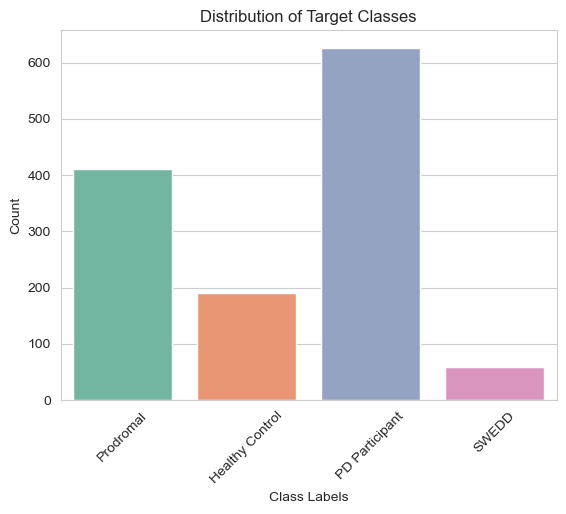

In [98]:
#EDA
target_labels = {
    1: 'PD Participant',
    2: 'Healthy Control',
    3: 'SWEDD',
    4: 'Prodromal'
}

# Use a temporary variable to store the mapped labels
mapped_labels = df['COHORT'].map(target_labels)

# Visualize the distribution of target classes
sns.countplot(x=mapped_labels, palette='Set2')
plt.title('Distribution of Target Classes')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

combining some classes to convert the multiclass classification problem into a binary class classification problem

In [99]:
# df = df_filtered
# List of columns to potentially drop
columns_to_drop = ['EDUCYRS', 'age_LP', 'duration', 'duration_yrs', 'fampd_bin', 'age_at_visit', 'SEX', 'Stage_PDTreat', 'scopa_pm', 
                   'quip_sex', 'scopa_sex', 'NP1ANXS', 'pm_auto_any', 'pm_wb_any', 'AFICBERB', 'handed', 'scopa_therm', 'pigd', 
                   'NP1APAT', 'NP1DDS', 'updrs3_score_on', 'pm_any', 'pm_cog_any', 'scopa_cv', 'NHY', 'td_pigd', 'td_pigd_on', 
                   'NP1COG', 'NP1HALL', 'NP1FATG', 'updrs1_score', 'updrs_totscore_on', 'pm_adl_any', 'NHY_ON', 'pigd_on', 
                   'updrs2_score', 'updrs3_score', 'updrs_totscore', 'pm_fd_any', 'pm_mc_any', 'hy', 'hy_on', 'scopa', 'scopa_gi', 
                   'scopa_ur', 'PRIMDIAG', 'enroll_phase', 'SITE', 'visit_date', 'PATNO', 'subgroup', 'EVENT_ID', 'APOE', 
                   'study_status', 'PDTRTMNT', 'LEDD', 'YEAR', 'HISPLAT', 'ASHKJEW', 'BASQUE', 'age_DATSCAN', 'age_upsit', 'quip_buy',
                   'quip_hobby', 'quip', 'quip_gamble', 'quip_eat', 'quip_pund']

# Drop columns if they exist in the DataFrame
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Display the cleaned DataFrame shape after dropping the columns
print("Cleaned DataFrame Shape after dropping columns:", df.shape)

#shuffling the dataset
df = df.sample(frac=1).reset_index(drop=True)
df = df.dropna(axis=1, how='any')
 
df.head()
# df.shape

Cleaned DataFrame Shape after dropping columns: (1285, 41)


,COHORT,age,race,fampd,BMI,upsit,upsit_pctl,upsit_pctl15,moca,bjlot,...,stai,stai_state,stai_trait,orthostasis,NP1DPRS,abeta,tau,ptau,urate,nfl_serum
0,3,78.819178,1.0,3.0,30.508337,32.0,50.0,0.0,24.0,9.0,...,60.0,31.0,29.0,0.0,0.0,810.15,199.80,15.700,6.0,11.70
1,4,61.704110,1.0,1.0,24.881633,33.0,49.0,0.0,29.0,15.0,...,51.0,23.0,28.0,0.0,0.0,1058.60,176.10,16.860,6.0,7.95
2,1,76.175342,1.0,3.0,23.444088,34.0,70.0,0.0,27.0,15.0,...,45.0,20.0,25.0,0.0,0.0,810.15,292.90,24.700,4.7,23.30
3,4,63.435616,1.0,3.0,25.979483,34.0,42.0,0.0,29.0,14.0,...,54.0,20.0,34.0,0.0,0.0,482.90,81.39,13.985,4.3,14.20
4,4,53.868493,1.0,3.0,33.805698,40.0,100.0,0.0,27.0,15.0,...,59.0,33.0,26.0,0.0,0.0,823.50,135.80,13.490,4.8,11.70


<class 'pandas.core.frame.DataFrame'>
Index(['COHORT', 'age', 'race', 'fampd', 'BMI', 'upsit', 'upsit_pctl',
       'upsit_pctl15', 'moca', 'bjlot', 'hvlt_discrimination',
       'hvlt_immediaterecall', 'hvlt_retention', 'HVLTFPRL', 'HVLTRDLY',
       'HVLTREC', 'lns', 'SDMTOTAL', 'VLTANIM', 'cogstate', 'MSEADLG',
       'quip_any', 'quip_walk', 'ess', 'rem', 'gds', 'stai', 'stai_state',
       'stai_trait', 'orthostasis', 'NP1DPRS', 'abeta', 'tau', 'ptau', 'urate',
       'nfl_serum'],
      dtype='object')
COHORT column length: 1285


/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP Result Shape: (1285, 2)
Number of samples in UMAP result: 1285


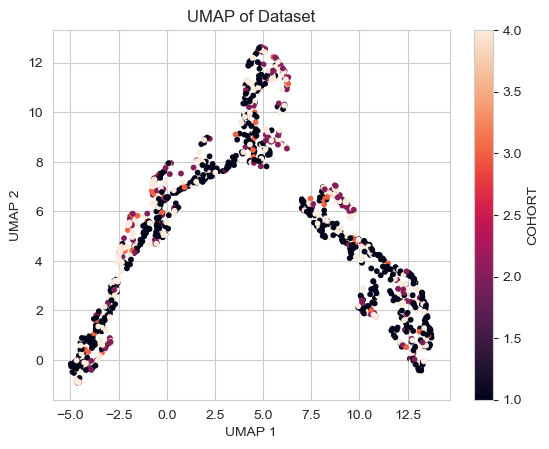

In [100]:
# !pip install umap-learn
import umap
print(type(df))  # Should output: <class 'pandas.core.frame.DataFrame'>

# Check if the 'COHORT' column exists
print(df.columns)  # List all columns in df

# If 'COHORT' exists, print its length
if 'COHORT' in df.columns:
    print("COHORT column length:", len(df['COHORT']))
else:
    print("COHORT column is missing from the DataFrame.")

# Create a UMAP object
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)

# Fit the UMAP model to your data
umap_result = umap_model.fit_transform(df)

# Ensure umap_result is a NumPy array and has the correct shape
umap_result = np.array(umap_result)

# Check if the shape is correct (n_samples, 2)
print("UMAP Result Shape:", umap_result.shape)  # Should be (n_samples, 2)

# Ensure 'COHORT' column exists and matches the number of samples
if 'COHORT' in df.columns:
    print("Number of samples in UMAP result:", umap_result.shape[0])

    # Adjust point size (default is 's=50')
    point_size = 10  # Adjust this value to your desired size

    # Visualize the UMAP results
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=df['COHORT'], s=point_size)
    plt.colorbar(label='COHORT')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.title('UMAP of Dataset')
    plt.show()
else:
    print("Can't proceed with plotting because 'COHORT' column is missing.")

In [101]:
# First, inspect the unique values in the 'Cohort' column to confirm labels
print(df['COHORT'].unique())

# Step 1: Remove records where 'Cohort' is 3 (SWEDD)
df_filtered = df[df['COHORT'] != 3]

# Step 2: Combine 'Cohort' 1 (PD Participant) and 4 (Prodromal) into one class
df_filtered['COHORT'] = df_filtered['COHORT'].replace({1: 1, 4: 1})

# Step 3: Keep 'Healthy Control' (Cohort 2) as the second class
df_filtered['COHORT'] = df_filtered['COHORT'].replace({2: 0})

# Step 4: Check the new unique values in the 'Cohort' column
print(df_filtered['COHORT'].unique())

# Your dataset is now ready for binary classification
df_filtered.head()

[3 4 1 2]
[1 0]


/var/folders/yt/h8g2tq612_99wzrx5yrmx9bm0000gn/T/ipykernel_42353/2535748699.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['COHORT'] = df_filtered['COHORT'].replace({1: 1, 4: 1})
/var/folders/yt/h8g2tq612_99wzrx5yrmx9bm0000gn/T/ipykernel_42353/2535748699.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['COHORT'] = df_filtered['COHORT'].replace({2: 0})


,COHORT,age,race,fampd,BMI,upsit,upsit_pctl,upsit_pctl15,moca,bjlot,...,stai,stai_state,stai_trait,orthostasis,NP1DPRS,abeta,tau,ptau,urate,nfl_serum
1,1,61.704110,1.0,1.0,24.881633,33.0,49.0,0.0,29.0,15.0,...,51.0,23.0,28.0,0.0,0.0,1058.60,176.10,16.860,6.0,7.95
2,1,76.175342,1.0,3.0,23.444088,34.0,70.0,0.0,27.0,15.0,...,45.0,20.0,25.0,0.0,0.0,810.15,292.90,24.700,4.7,23.30
3,1,63.435616,1.0,3.0,25.979483,34.0,42.0,0.0,29.0,14.0,...,54.0,20.0,34.0,0.0,0.0,482.90,81.39,13.985,4.3,14.20
4,1,53.868493,1.0,3.0,33.805698,40.0,100.0,0.0,27.0,15.0,...,59.0,33.0,26.0,0.0,0.0,823.50,135.80,13.490,4.8,11.70
5,1,82.252055,1.0,3.0,26.674874,14.0,7.5,1.0,24.0,14.0,...,79.0,40.0,39.0,0.0,0.0,1006.00,232.10,21.260,5.5,41.20


In [102]:
# Check for missing values
df = df_filtered
df.head()

,COHORT,age,race,fampd,BMI,upsit,upsit_pctl,upsit_pctl15,moca,bjlot,...,stai,stai_state,stai_trait,orthostasis,NP1DPRS,abeta,tau,ptau,urate,nfl_serum
1,1,61.704110,1.0,1.0,24.881633,33.0,49.0,0.0,29.0,15.0,...,51.0,23.0,28.0,0.0,0.0,1058.60,176.10,16.860,6.0,7.95
2,1,76.175342,1.0,3.0,23.444088,34.0,70.0,0.0,27.0,15.0,...,45.0,20.0,25.0,0.0,0.0,810.15,292.90,24.700,4.7,23.30
3,1,63.435616,1.0,3.0,25.979483,34.0,42.0,0.0,29.0,14.0,...,54.0,20.0,34.0,0.0,0.0,482.90,81.39,13.985,4.3,14.20
4,1,53.868493,1.0,3.0,33.805698,40.0,100.0,0.0,27.0,15.0,...,59.0,33.0,26.0,0.0,0.0,823.50,135.80,13.490,4.8,11.70
5,1,82.252055,1.0,3.0,26.674874,14.0,7.5,1.0,24.0,14.0,...,79.0,40.0,39.0,0.0,0.0,1006.00,232.10,21.260,5.5,41.20


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


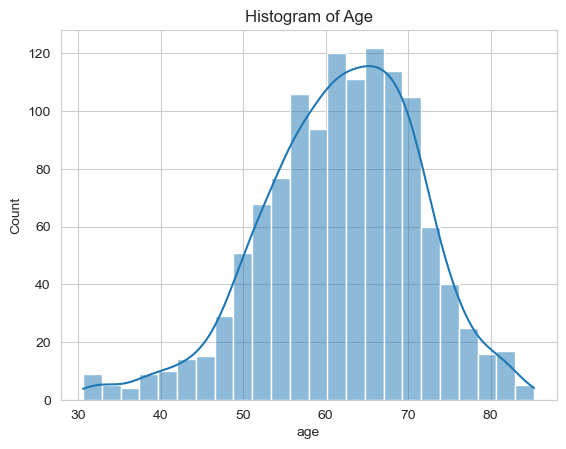

In [103]:
# Assuming 'df' is your DataFrame
sns.set_style('whitegrid')

# Histogram
sns.histplot(df['age'], kde=True)
plt.title('Histogram of Age')
plt.show()



In [104]:
X = df.drop(columns = 'COHORT')  # Select the feature columns you want to use
y = df['COHORT']                 # Target labels ('PD/Prodromal' or 'Healthy Control')

# Split the dataset into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

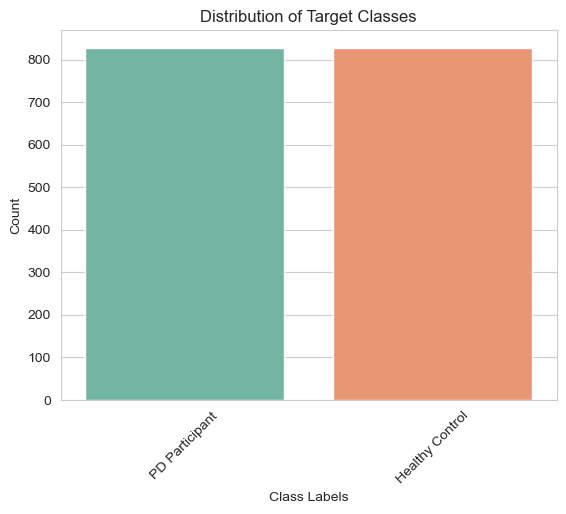

In [105]:
# addressing imbalance in the target class in the training data
# !pip install --upgrade scikit-learn imbalanced-learn

from imblearn.over_sampling import SMOTE

# Assuming your DataFrame is 'df' and 'COHORT' is the target column

# Separate features and target for the minority class (Healthy Control)
X = X_train  # Features
y = y_train  # Target

# Apply SMOTE to the minority class (Healthy Control)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine features and target into a final DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

X_train = X_resampled
y_train = y_resampled

target_labels = {
    1: 'PD Participant',
    0: 'Healthy Control',
}

# Use a temporary variable to store the mapped labels
mapped_labels = df_resampled['COHORT'].map(target_labels)

# Visualize the distribution of target classes
sns.countplot(x=mapped_labels, palette='Set2')
plt.title('Distribution of Target Classes')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [106]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model (you can replace LogisticRegression with any model like RandomForest)
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the model and the number of features to select
num_features_to_select = 20  # You can change this to select a different number of features
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Get the ranking of features (1 indicates selected features)
ranking = rfe.ranking_

# Get the names of the best features
selected_features = X_train.columns[rfe.support_]

# Print selected features
print("Selected Features:", selected_features)

Selected Features: Index(['race', 'fampd', 'upsit', 'upsit_pctl', 'upsit_pctl15', 'moca',
       'hvlt_discrimination', 'hvlt_immediaterecall', 'hvlt_retention',
       'HVLTRDLY', 'SDMTOTAL', 'MSEADLG', 'rem', 'gds', 'stai_state',
       'orthostasis', 'NP1DPRS', 'tau', 'ptau', 'nfl_serum'],
      dtype='object')


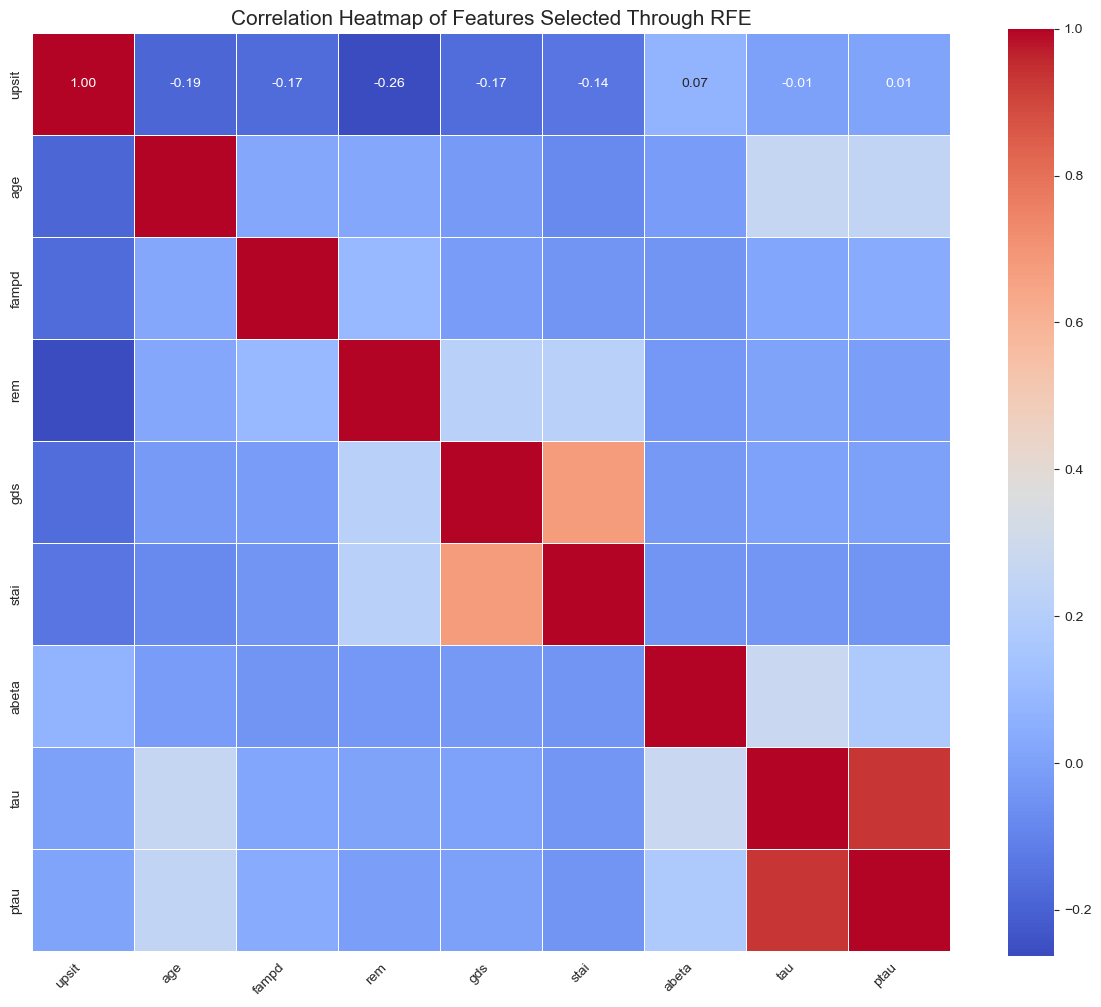

In [ ]:
# Filter the DataFrame to include only the selected features
df_selected = df[['upsit', 'age', 'fampd', 'rem', 'gds', 'stai',
       'abeta', 'tau', 'ptau']]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

# Title and layout adjustments
plt.title('Correlation Heatmap of Features Selected Through RFE', size=15)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score,
)
import pandas as pd

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),  # Increased max_iter
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True),
    # 'Gradient Boosting Trees': GradientBoostingClassifier(random_state=42)
}

# Create a list to store the results
results = []

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled if model_name == 'Logistic Regression' else X_train, y_train)
    y_pred = model.predict(X_test_scaled if model_name == 'Logistic Regression' else X_test)
    y_prob = model.predict_proba(X_test_scaled if model_name == 'Logistic Regression' else X_test)[:, 1]  # Probability estimates for ROC AUC

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate metrics
    sensitivity = tp / (tp + fn)  # True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate
    f1_score = (2 * tp) / (2 * tp + fp + fn) if (2 * tp + fp + fn) != 0 else 0
    roc_auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

    # Append the results
    results.append({
        'Model': model_name,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        # 'F1 Score': f1_score,
        'ROC AUC': roc_auc,
        'Accuracy': accuracy  # Add accuracy to the results
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


                    Model  Sensitivity  Specificity   ROC AUC  Accuracy
0     Logistic Regression     0.894231     0.842105  0.935729  0.886179
1             Naive Bayes     0.894231     0.842105  0.929276  0.886179
2     K-Nearest Neighbors     0.649038     0.552632  0.674595  0.634146
3           Random Forest     0.956731     0.815789  0.933135  0.934959
4  Support Vector Machine     0.725962     0.631579  0.761197  0.711382
